# IMPORT LIBRARIES

In [109]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

# READ DATA

In [110]:
df = pd.read_csv('income_evaluation.csv')

In [111]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# UNDERSTANDING DATA

In [112]:
df.shape

(32561, 15)

**Our data has 32,561 rows and 15 columns**

In [113]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [114]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### VALUE COUNTS FOR CATEGORICAL VARIABLES

In [116]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [117]:
df['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [118]:
df['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [119]:
df['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [120]:
df['relationship'].value_counts()

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [121]:
df['race'].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [122]:
df['sex'].value_counts()

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [123]:
df['native-country'].value_counts()

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [124]:
print("Number of unique values in native-country :", df['native-country'].nunique())

Number of unique values in native-country : 42


In [125]:
df['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

### Correct not standard data

In [126]:
df.replace(' ?', np.nan, inplace = True)

# SPLIT DATA

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
input_df = df.drop('income', axis = 1)
output_df = df['income']

In [129]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [130]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States
19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States
10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States
9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States


In [131]:
x_train.shape

(26048, 14)

In [132]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States


In [133]:
x_test.shape

(6513, 14)

Data has been splitted into 26,048 for training and 6,513 for testing

# MISSING VALUES

### Checking missing values

In [134]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Missing values found in `workclass`, `occupation` and `native-country`. The columns that contains missing values are all categorical, so we are going to impute the missing values with mode.

### Impute missing values

In [135]:
print("Mode for workclass :", st.mode(x_train['workclass']))
print("Mode for occupation :", st.mode(x_train['occupation']))
print("Mode for native-country :", st.mode(x_train['native-country']))

Mode for workclass :  Private
Mode for occupation :  Prof-specialty
Mode for native-country :  United-States


In [136]:
x_train['workclass'].fillna(' Private', inplace = True)
x_train['occupation'].fillna(' Prof-specialty', inplace = True)
x_train['native-country'].fillna(' United-States', inplace = True)

In [137]:
x_test['workclass'].fillna(' Private', inplace = True)
x_test['occupation'].fillna(' Prof-specialty', inplace = True)
x_test['native-country'].fillna(' United-States', inplace = True)

In [138]:
x_train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [139]:
x_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

After imputing missing values, we madde sure there were no more missing values found in both training and testing set.

# FEATURE ENGINEERING

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [142]:
num_cols = df.select_dtypes(include = np.number).columns
num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

1. Label Encoding

In [143]:
labelEnc = LabelEncoder()

cols = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex']

for col in cols:
    labelEnc = LabelEncoder()
    x_train[col] = labelEnc.fit_transform(x_train[col])
    x_test[col] = labelEnc.fit_transform(x_test[col])

2. Frequency Encoding

The number of unique values in `native-country` is 41, it is more suitable to use frequency encoding.

In [144]:
freq_encode = x_train['native-country'].value_counts(normalize = True)

x_train['native-country'] = x_train['native-country'].map(freq_encode)
x_test['native-country'] = x_test['native-country'].map(freq_encode)

# SCALING

The data has been measured with their own units, which makes them has multiple range value, some features might give more influence to the final results compared to the others. To prevent this happening, we need to standardize our data, in this case we use Standard Scaler.

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = input_df.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = input_df.columns)

# MODELING

### MODEL 1 : LOGISTIC REGRESSION

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [148]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

LogisticRegression()

In [149]:
y_predict_LogReg = LogReg.predict(x_test)

In [150]:
print("\nClassification Report Logistic Regression\n")
print(classification_report(y_test, y_predict_LogReg, target_names = ['<=50K', '>50K']))


Classification Report Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4942
        >50K       0.72      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513



With our Logistic Regression model, we got an accuracy of 83%. We will try to tune the hyperparameters to gain better accuracy.

**TUNING HYPERPARAMETER (LOGISTIC REGRESSION)**

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
params_LogReg = {
    'penalty':['l1', 'l2'],
    'C':[0.1, 1, 10],
    'solver':['lbfgs', 'liblinear']
}

In [153]:
LogReg2 = LogisticRegression()
LogReg2 = GridSearchCV(LogReg2, 
                       param_grid = params_LogReg,
                      scoring = 'accuracy',
                      cv = 5)
LogReg2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [154]:
print("Tuned Hyperparameters (Logistic Regression) :", LogReg2.best_params_)
print("Accuracy score :", LogReg2.best_score_)

Tuned Hyperparameters (Logistic Regression) : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score : 0.8244010937809174


**Train model again with tuned hyperparameters**

In [155]:
LogReg_tuned = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
LogReg_tuned.fit(x_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [156]:
y_predict_LogReg_tuned = LogReg_tuned.predict(x_test)

In [157]:
print("\nClassification Report Logistic Regression (tuned)\n")
print(classification_report(y_test, y_predict_LogReg_tuned, target_names = ['<=50K', '>50K']))


Classification Report Logistic Regression (tuned)

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4942
        >50K       0.72      0.45      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.82      0.83      0.81      6513



After tuning the hyperparameters there are no changes visible in the report.

### MODEL 2 : DECISION TREE

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
DecTree = DecisionTreeClassifier()
DecTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [160]:
y_predict_DT = DecTree.predict(x_test)

In [161]:
print("\nClassification Report Decision Tree\n")
print(classification_report(y_test, y_predict_DT, target_names = ['<=50K', '>50K']))


Classification Report Decision Tree

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      4942
        >50K       0.60      0.60      0.60      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



Overall accuracy showed a slightly lower result than Logistic Regression.

**TUNING HYPERPARAMETER (DECISION TREE)**

In [162]:
params_DT = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[None, 5, 10, 15],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

In [163]:
DecTree2 = DecisionTreeClassifier()
DecTree2 = GridSearchCV(DecTree2,
                       param_grid = params_DT,
                       scoring = 'accuracy',
                       cv = 5)
DecTree2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [164]:
print("Tuned Hyperparameters (Decision Tree) :", DecTree2.best_params_)
print("Accuracy score :", DecTree2.best_score_)

Tuned Hyperparameters (Decision Tree) : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy score : 0.8519657583637356


**Train model again with tuned hyperparameters**

In [165]:
DecTree_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 4,
                                      min_samples_split = 10, splitter = 'best')  
DecTree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)

In [166]:
y_predict_DT_tuned = DecTree_tuned.predict(x_test)

In [167]:
print("\nClassification Report Decision Tree (tuned)\n")
print(classification_report(y_test, y_predict_DT_tuned, target_names = ['<=50K', '>50K']))


Classification Report Decision Tree (tuned)

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4942
        >50K       0.79      0.52      0.63      1571

    accuracy                           0.85      6513
   macro avg       0.83      0.74      0.77      6513
weighted avg       0.85      0.85      0.84      6513



The tuned Decision Tree provides the highest accuracy of 85% amongst the other models. 

### MODEL 3 : SVC

In [168]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [169]:
SVC_model = make_pipeline(SVC(gamma = 'auto'))
SVC_model.fit(x_train, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto'))])

In [170]:
y_predict_SVC = SVC_model.predict(x_test)

In [171]:
print("\nClassification Report SVC\n")
print(classification_report(y_test, y_predict_SVC, target_names = ['<=50K', '>50K']))


Classification Report SVC

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      4942
        >50K       0.77      0.56      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513



**TUNING HYPERPARAMETER (SVC)**

In [172]:
params_SVC = {
    'C':[0.1, 1, 10],
    'kernel':['linear', 'poly', 'rbf'],
    'gamma':['auto', 'scale']
}

In [173]:
SVC2 = SVC()
SVC2 = GridSearchCV(SVC2,
                   param_grid = params_SVC,
                   scoring = 'accuracy',
                   cv = 5,
                   n_jobs = -1)
SVC2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [174]:
print("Tuned Hyperparameters (SVC) :", SVC2.best_params_)
print("Accuracy score :", SVC2.best_score_)

Tuned Hyperparameters (SVC) : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy score : 0.8472054162863699


**Train model again with tuned hyperparameters**

In [175]:
SVC_tuned = make_pipeline(SVC(C = 1, gamma = 'scale', kernel = 'rbf'))
SVC_tuned.fit(x_train, y_train)

Pipeline(steps=[('svc', SVC(C=1))])

In [176]:
y_predict_SVC_tuned = SVC_tuned.predict(x_test)

In [177]:
print("\nClassification Report SVC (tuned)\n")
print(classification_report(y_test, y_predict_SVC_tuned, target_names = ['<=50K', '>50K']))


Classification Report SVC (tuned)

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      4942
        >50K       0.77      0.56      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513



There are no difference betweeen SVC and SVC with tuned hyperparameters.

### MODEL 4 : RANDOM FOREST

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [180]:
y_predict_RF = RF.predict(x_test)

In [181]:
print("\nClassification Report Random Forest\n")
print(classification_report(y_test, y_predict_RF, target_names = ['<=50K', '>50K']))


Classification Report Random Forest

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.74      0.63      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



**TUNING HYPERPARAMETERS (RANDOM FOREST)**

In [182]:
params_RF = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2 ,4]
}

In [183]:
RF2 = RandomForestClassifier()
RF2 = GridSearchCV(RF2, 
                  param_grid = params_RF,
                  scoring = 'accuracy',
                  cv = 5)
RF2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [184]:
print("Tuned Hyperparameters Random Forest :", RF2.best_params_)
print("Accuracy :", RF2.best_score_)

Tuned Hyperparameters Random Forest : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy : 0.8632143319052474


**Tuning model again with tuned hyperparameters**

In [185]:
RF_tuned = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 4, min_samples_split = 10)
RF_tuned.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

In [186]:
y_predict_RF_tuned = RF_tuned.predict(x_test)

In [187]:
print("\nClassification Report Random Forest (tuned)\n")
print(classification_report(y_test, y_predict_RF_tuned, target_names = ['<=50K', '>50K']))


Classification Report Random Forest (tuned)

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      4942
        >50K       0.78      0.62      0.69      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



After tuning hyperparameters, Random Forest also shows a better accuracy by 87%.

### MODEL 5 : BAGGING CLASSIFIER

In [188]:
from sklearn.ensemble import BaggingClassifier

In [189]:
Bagging = BaggingClassifier()
Bagging.fit(x_train, y_train)

BaggingClassifier()

In [190]:
y_predict_bagging = Bagging.predict(x_test)

In [191]:
print("\nClassification Report Bagging\n")
print(classification_report(y_test, y_predict_bagging, target_names = ['<=50K', '>50K']))


Classification Report Bagging

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4942
        >50K       0.71      0.56      0.63      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



Bagging model showed a nice accuracy but still lower than SVC and Decision Tree with tuned hyperparameters

#### MODEL 5.1 BAGGING WITH DECISION TREE

In [192]:
DT_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 4,
                                      min_samples_split = 2, splitter = 'best')
Bagging2 = BaggingClassifier(estimator = DT_model, n_estimators = 5, bootstrap = True)
Bagging2.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   min_samples_leaf=4),
                  n_estimators=5)

In [193]:
y_predict_bagging2 = Bagging2.predict(x_test)

In [194]:
print("\nClassification Report Bagging with Decision Tree\n")
print(classification_report(y_test, y_predict_bagging2, target_names = ['<=50K', '>50K']))


Classification Report Bagging with Decision Tree

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4942
        >50K       0.79      0.52      0.63      1571

    accuracy                           0.85      6513
   macro avg       0.83      0.74      0.77      6513
weighted avg       0.84      0.85      0.84      6513



#### MODEL 5.2 BAGGING WITH LOGISTIC REGRESSION

In [195]:
LogReg_model = LogisticRegression()
Bagging3 = BaggingClassifier(estimator = LogReg_model, n_estimators = 5, bootstrap = True)
Bagging3.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=5)

In [196]:
y_predict_bagging3 = Bagging3.predict(x_test)

In [197]:
print("\nClassification Report Bagging with Logistic Regression\n")
print(classification_report(y_test, y_predict_bagging3, target_names = ['<=50K', '>50K']))


Classification Report Bagging with Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4942
        >50K       0.72      0.45      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513



After using 2 different estimator for bagging, it shows that Bagging with Decision Tree gives the best accuracy among all bagging models with 85% accuracy.

### MODEL 6 : ADABOOST

In [198]:
from sklearn.ensemble import AdaBoostClassifier

In [199]:
ADABoost = AdaBoostClassifier()
ADABoost.fit(x_train, y_train)

AdaBoostClassifier()

In [200]:
y_predict_adaboost = ADABoost.predict(x_test)

In [201]:
print("\nClassification Report ADA Boost\n")
print(classification_report(y_test, y_predict_adaboost, target_names = ['<=50K', '>50K']))


Classification Report ADA Boost

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.77      0.60      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



As we can see, ADA Boosting shows the highest accuracy among all models we have trained. The accuracy is 86%.

#### MODEL 6.1 ADADBOOST WITH DECISION TREE

In [202]:
DT_model = DecisionTreeClassifier()
ADABoost2 = AdaBoostClassifier(estimator = DT_model, n_estimators = 5)
ADABoost2.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [203]:
y_predict_adaboost2 = ADABoost.predict(x_test)

In [204]:
print("\nClassification Report ADA Boost with Decision Tree\n")
print(classification_report(y_test, y_predict_adaboost2, target_names = ['<=50K', '>50K']))


Classification Report ADA Boost with Decision Tree

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.77      0.60      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



#### MODEL 6.2 ADABOOST WITH LOGISTIC REGRESSION

In [205]:
LogReg_model = LogisticRegression()
ADABoost3 = AdaBoostClassifier(estimator = LogReg_model, n_estimators = 5)
ADABoost3.fit(x_train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=5)

In [206]:
y_predict_adaboost3 = ADABoost3.predict(x_test)

In [207]:
print("\nClassification Report ADA Boost with Logistic Regression\n")
print(classification_report(y_test, y_predict_adaboost3, target_names = ['<=50K', '>50K']))


Classification Report ADA Boost with Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.81      0.98      0.88      4942
        >50K       0.77      0.26      0.38      1571

    accuracy                           0.80      6513
   macro avg       0.79      0.62      0.63      6513
weighted avg       0.80      0.80      0.76      6513



### MODEL 7 : STACKING

In [208]:
from sklearn.ensemble import StackingClassifier

In [209]:
estimators_stacking = [
    ('rf', RandomForestClassifier(criterion = 'gini', min_samples_leaf = 4, min_samples_split = 10)),
    ('svc', SVC(C = 1, gamma = 'scale', kernel = 'rbf'))
] 

In [210]:
stacking = StackingClassifier(estimators = estimators_stacking, final_estimator = LogisticRegression())
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(min_samples_leaf=4,
                                                       min_samples_split=10)),
                               ('svc', SVC(C=1))],
                   final_estimator=LogisticRegression())

In [211]:
y_predict_stacking = stacking.predict(x_test)

In [212]:
print("\nClassification Report Stacking\n")
print(classification_report(y_test, y_predict_stacking, target_names = ['<=50K', '>50K']))


Classification Report Stacking

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      4942
        >50K       0.77      0.63      0.69      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.80      6513
weighted avg       0.86      0.87      0.86      6513



# CONCLUSION

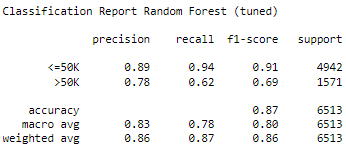
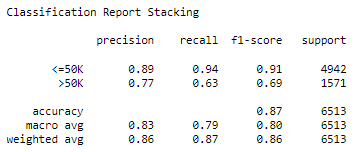

After training more than 10 models, including tuning the hyperparameters, Tuned Random Forest and Stacking model have achieved the highest accuracy by 87%.